In [24]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix
from sklearn.model_selection import cross_val_score


In [25]:
data= pd.read_csv("dataset.csv")

In [26]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [28]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [29]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [30]:
data.shape

(4424, 35)

In [31]:
data.drop_duplicates()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [32]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [33]:
corr_matrix = data.corr(method="pearson")
corr_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.040255,0.228973,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.060483,-0.120390,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518
Daytime/evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.018276,0.138463,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,0.026203,-0.000747,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.003293,0.036986,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,-0.017785,0.041695,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,-0.012569,-0.002057,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880


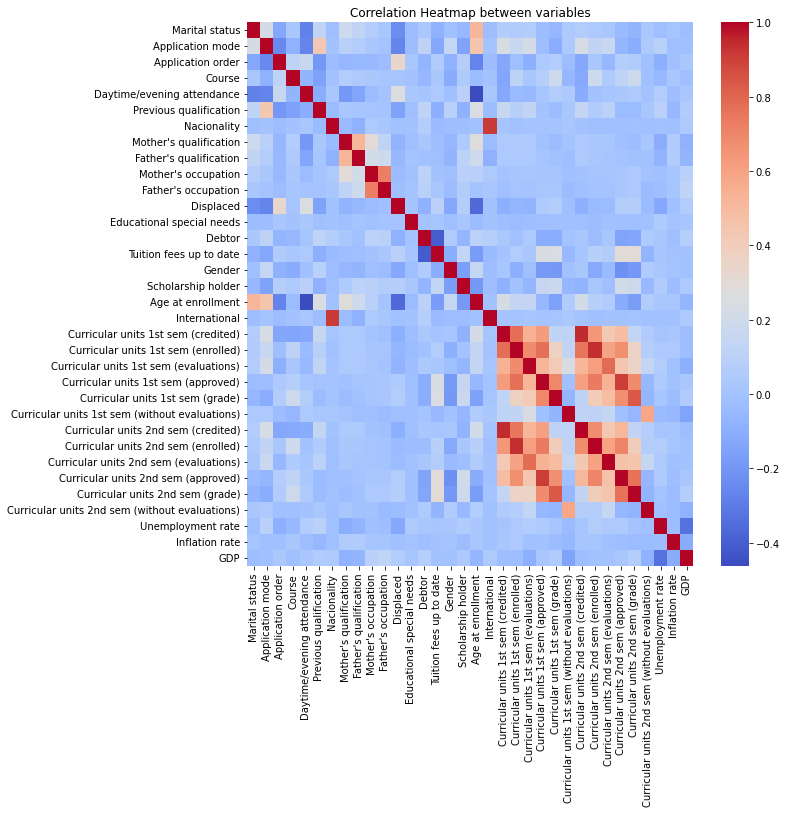

In [34]:
#plotting the correlation table into a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="coolwarm")
plt.title("Correlation Heatmap between variables")
plt.show() #display the plot

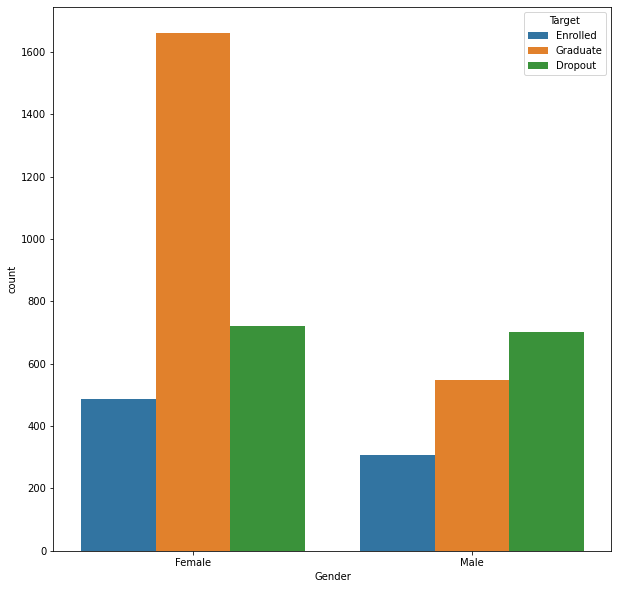

In [35]:
#Bar chart to displace the gender distribution in the dataset
plt.figure(figsize=(10,10))
sns.countplot(x="Gender",data=data, hue='Target', hue_order=['Enrolled', 'Graduate','Dropout'])
plt.xticks(ticks=[1,0], labels=['Male','Female'])
plt.show()

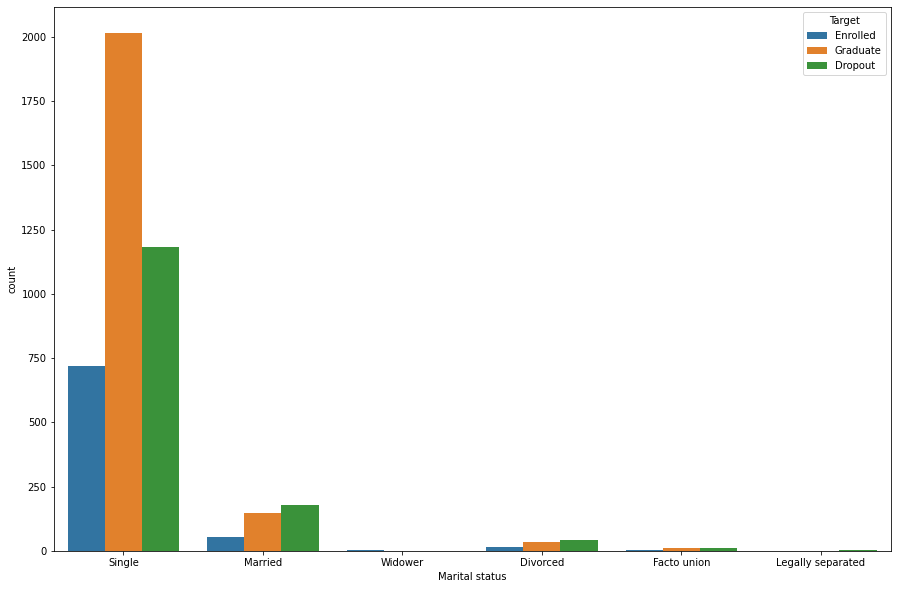

In [36]:
#Bar chart to determine the number of student who have enrolled,droped out or graduated depending on their marital status
plt.figure(figsize=(15,10))
sns.countplot(x="Marital status",data=data, hue='Target', hue_order=['Enrolled', 'Graduate','Dropout'])
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto union','Legally separated'])
plt.show()

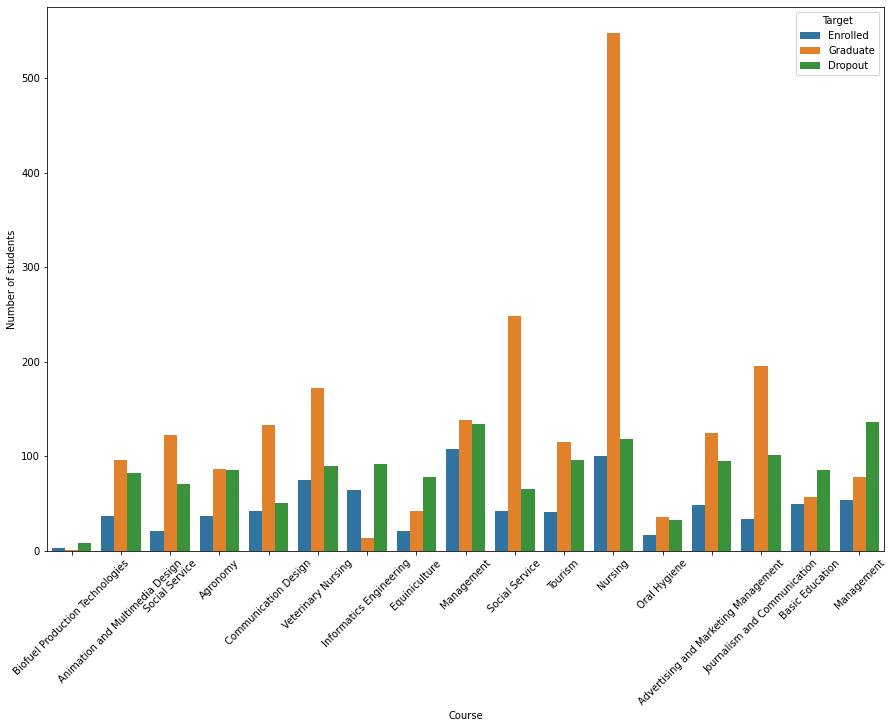

In [37]:
#Bar chart to determine the number of student who have enrolled,droped out or graduated depending on the courses they took

plt.figure(figsize=(15,10))
sns.countplot(x="Course",data=data, hue='Target', hue_order=['Enrolled', 'Graduate','Dropout'])
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], rotation=45,labels=['Biofuel Production Technologies','Animation and Multimedia Design','Social Service','Agronomy','Communication Design',
                                                         'Veterinary Nursing','Informatics Engineering','Equiniculture','Management','Social Service','Tourism','Nursing',
                                                         'Oral Hygiene','Advertising and Marketing Management','Journalism and Communication','Basic Education','Management'])
plt.ylabel("Number of students")
plt.show()

In [38]:
#determing independent and dependent variables
X = data.drop("Target",axis=1) #independent variables 
y = data['Target'] #dependent variable

#splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#creating a random forest classifier 
rf = RandomForestClassifier(n_estimators = 1000)

# training the classifier on the training data
rf.fit(X_train, y_train)

# testing the classifier using test data
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     Dropout       0.83      0.79      0.81       428
    Enrolled       0.64      0.41      0.50       233
    Graduate       0.81      0.95      0.87       667

    accuracy                           0.80      1328
   macro avg       0.76      0.71      0.73      1328
weighted avg       0.79      0.80      0.79      1328

Accuracy: 0.8004518072289156


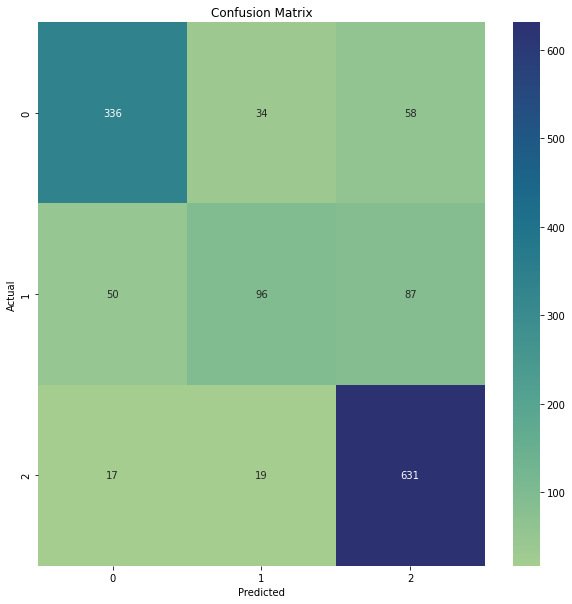

In [39]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap="crest",fmt="g",linecolor="white")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()